In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

/home/kiwoong/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
import colorsys
import random
import platform

## 브리핑한 청원에 대해서 분석 예정

In [3]:
df = pd.read_csv("briefing.csv")

In [4]:
df

num     category  start-days    end-days          person progress  \
0     1785       인권/성평등  2017-09-03  2017-11-02     naver - ***     브리핑    
1    10949           미래  2017-09-06  2017-12-05  facebook - ***     브리핑    
2    18278       인권/성평등  2017-09-30  2017-10-30     naver - ***     브리핑    
3    26024        안전/환경  2017-11-04  2017-12-04  facebook - ***     브리핑    
4    45581         보건복지  2017-11-17  2017-12-17     kakao - ***     브리핑    
5    49083           기타  2017-11-24  2017-12-24     naver - ***     브리핑    
6    57132         성장동력  2017-12-03  2018-01-02     naver - ***     브리핑    
7    76020         성장동력  2017-12-28  2018-01-27     kakao - ***     브리핑    
8    79162       인권/성평등  2018-01-03  2018-02-02     naver - ***     브리핑    
9    81026       인권/성평등  2018-01-06  2018-02-05     naver - ***     브리핑    
10   95138     교통/건축/국토  2018-01-14  2018-02-13     kakao - ***     브리핑    
11   96427         정치개혁  2018-01-15  2018-02-14     naver - ***     브리핑    
12  101349  문화/예술/체육/언론  2018-01-18  2018-02-17   twitter - ***     브리핑    
13  105105     외교/통일/국방  2018-01-20  2018-02-19     kakao - ***     브리핑    
14  113699        안전/환경  2018-01-25  2018-02-24  facebook - ***     브리핑    
15  127921         보건복지  2018-02-05  2018-03-07  facebook - ***     브리핑    
16  134590        경제민주화  2018-02-08  2018-03-10  facebook - ***     브리핑    
17  141333  문화/예술/체육/언론  2018-02-17  2018-03-19  facebook - ***     브리핑    
18  142600  문화/예술/체육/언론  2018-02-19  2018-03-21     naver - ***     브리핑    
19  148613        육아/교육  2018-02-23  2018-03-25     naver - ***     브리핑    
20  148806       인권/성평등  2018-02-23  2018-03-25  facebook - ***     브리핑    
21  151430       인권/성평등  2018-02-26  2018-03-28  facebook - ***     브리핑    
22  157046       인권/성평등  2018-03-03  2018-04-02     naver - ***     브리핑    
23  164255           기타  2018-03-12  2018-04-11  facebook - ***     브리핑    
24  165796         정치개혁  2018-03-13  2018-04-12     naver - ***     브리핑    
25  173355        안전/환경  2018-03-23  2018-04-22     naver - ***     브리핑    
26  174292        안전/환경  2018-03-24  2018-04-23     naver - ***     브리핑    
27  178781        안전/환경  2018-03-28  2018-04-27     naver - ***     브리핑    
28  187633        경제민주화  2018-04-06  2018-05-06     naver - ***     브리핑    
29  199622  문화/예술/체육/언론  2018-04-14  2018-05-14     naver - ***     브리핑    
..     ...          ...         ...         ...             ...      ...   
38  242950           기타  2018-05-25  2018-06-24  facebook - ***     브리핑    
39  244045       인권/성평등  2018-05-25  2018-06-24     naver - ***     브리핑    
40  246489       인권/성평등  2018-05-28  2018-06-27     naver - ***     브리핑    
41  269548     외교/통일/국방  2018-06-13  2018-07-13     naver - ***     브리핑    
42  270921  문화/예술/체육/언론  2018-06-14  2018-07-14     naver - ***     브리핑    
43  272632         반려동물  2018-06-17  2018-07-17  facebook - ***     브리핑    
44  273112     외교/통일/국방  2018-06-17  2018-07-17  facebook - ***     브리핑    
45  281200         반려동물  2018-06-24  2018-07-24  facebook - ***     브리핑    
46  282903           기타  2018-06-24  2018-07-24   twitter - ***     브리핑    
47  284845  문화/예술/체육/언론  2018-06-26  2018-07-26     naver - ***     브리핑    
48  294226       인권/성평등  2018-07-03  2018-08-02     naver - ***     브리핑    
49  314584        육아/교육  2018-07-22  2018-08-21     naver - ***     브리핑    
50  322420       인권/성평등  2018-07-29  2018-08-28     naver - ***     브리핑    
51  369690       인권/성평등  2018-09-06  2018-10-06     naver - ***     브리핑    
52  384676           기타  2018-09-19  2018-10-19     naver - ***     브리핑    
53  395955     교통/건축/국토  2018-10-02  2018-11-01     naver - ***     브리핑    
54  397558         정치개혁  2018-10-04  2018-11-03     naver - ***     브리핑    
55  398030       인권/성평등  2018-10-04  2018-11-03     naver - ***     브리핑    
56  408609        안전/환경  2018-10-17  2018-11-16     naver - ***     브리핑    
57  410447         보건복지  2018-10-18  2018-11-17     naver - ***     브리핑    
58  411485  문화/예술/체육/언론  2018-10-19  2018-11-18     nav

In [5]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

## 청원에 대한 워드클라우드

In [6]:
def make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
    text = list(df["petition_overview"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')

    if platform.system() == 'Darwin': 
        font_url = "/Library/Fonts/AppleGothic.ttf"
        rc('font', family='AppleGothic')
        #Mac pc의 경우
    elif platform.system() == 'Windows': 
        font_url = 'C:/Windows/Fonts/malgun.ttf'
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)
    elif platform.system() == 'Linux': 
        font_url = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
        font_name = font_manager.FontProperties(fname=font_url).get_name()
        rc('font', family=font_name)

    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
        
    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path=font_url,
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

    return tmp_data

128879
ok


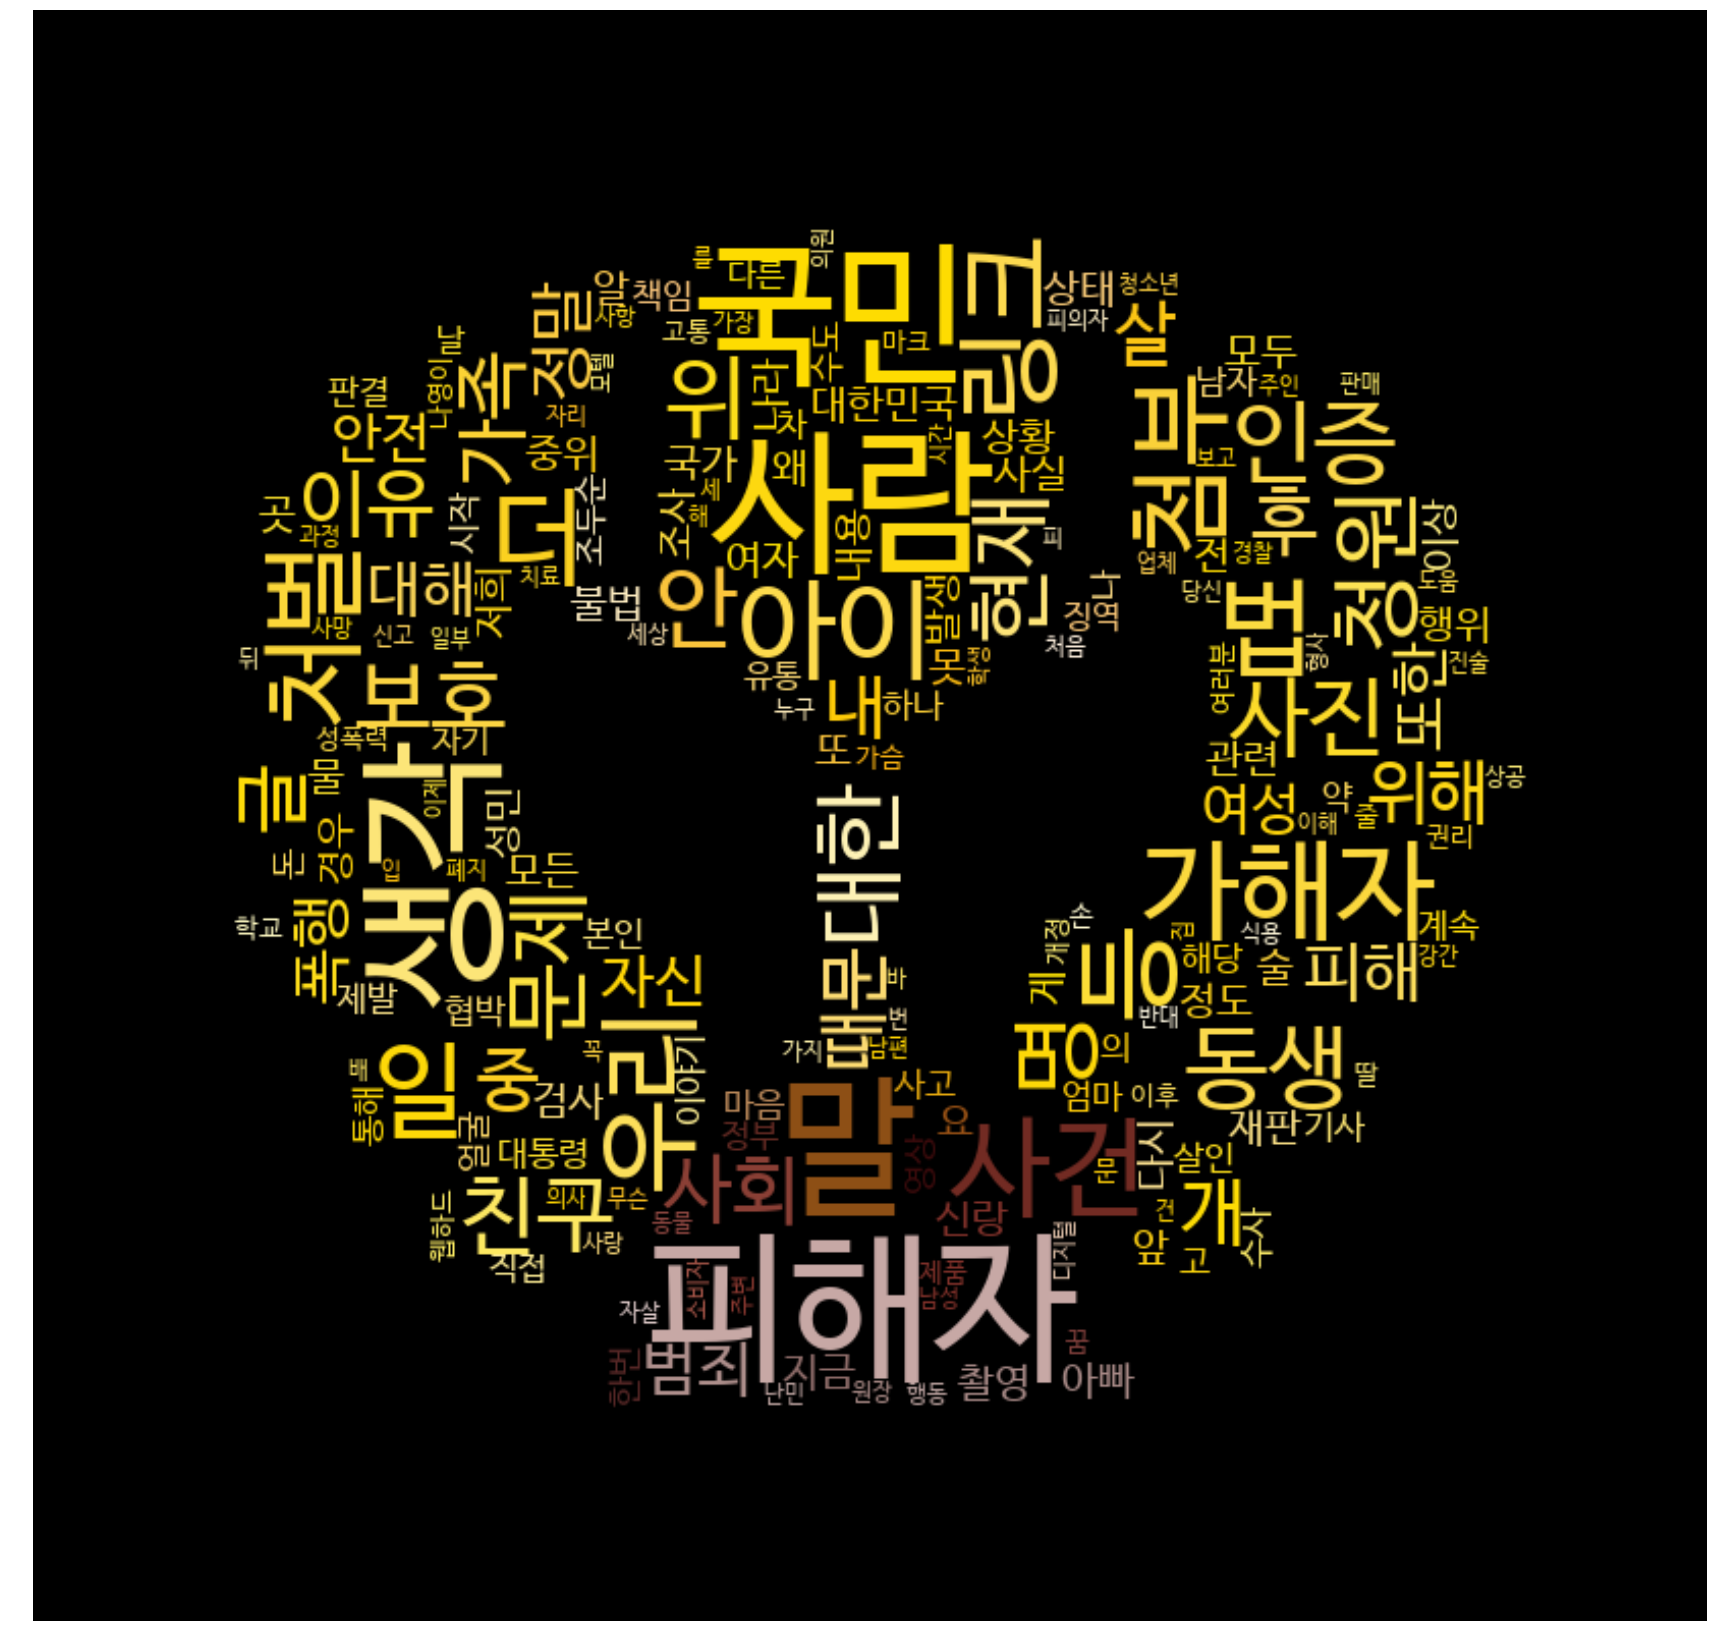

In [15]:
keyword = make_cloud("기타", png_name="tr.JPG",state="img",max_font_size_n = 100,background_color_n='black')

In [7]:
df

num     category  start-days    end-days          person progress  \
0     1785       인권/성평등  2017-09-03  2017-11-02     naver - ***     브리핑    
1    10949           미래  2017-09-06  2017-12-05  facebook - ***     브리핑    
2    18278       인권/성평등  2017-09-30  2017-10-30     naver - ***     브리핑    
3    26024        안전/환경  2017-11-04  2017-12-04  facebook - ***     브리핑    
4    45581         보건복지  2017-11-17  2017-12-17     kakao - ***     브리핑    
5    49083           기타  2017-11-24  2017-12-24     naver - ***     브리핑    
6    57132         성장동력  2017-12-03  2018-01-02     naver - ***     브리핑    
7    76020         성장동력  2017-12-28  2018-01-27     kakao - ***     브리핑    
8    79162       인권/성평등  2018-01-03  2018-02-02     naver - ***     브리핑    
9    81026       인권/성평등  2018-01-06  2018-02-05     naver - ***     브리핑    
10   95138     교통/건축/국토  2018-01-14  2018-02-13     kakao - ***     브리핑    
11   96427         정치개혁  2018-01-15  2018-02-14     naver - ***     브리핑    
12  101349  문화/예술/체육/언론  2018-01-18  2018-02-17   twitter - ***     브리핑    
13  105105     외교/통일/국방  2018-01-20  2018-02-19     kakao - ***     브리핑    
14  113699        안전/환경  2018-01-25  2018-02-24  facebook - ***     브리핑    
15  127921         보건복지  2018-02-05  2018-03-07  facebook - ***     브리핑    
16  134590        경제민주화  2018-02-08  2018-03-10  facebook - ***     브리핑    
17  141333  문화/예술/체육/언론  2018-02-17  2018-03-19  facebook - ***     브리핑    
18  142600  문화/예술/체육/언론  2018-02-19  2018-03-21     naver - ***     브리핑    
19  148613        육아/교육  2018-02-23  2018-03-25     naver - ***     브리핑    
20  148806       인권/성평등  2018-02-23  2018-03-25  facebook - ***     브리핑    
21  151430       인권/성평등  2018-02-26  2018-03-28  facebook - ***     브리핑    
22  157046       인권/성평등  2018-03-03  2018-04-02     naver - ***     브리핑    
23  164255           기타  2018-03-12  2018-04-11  facebook - ***     브리핑    
24  165796         정치개혁  2018-03-13  2018-04-12     naver - ***     브리핑    
25  173355        안전/환경  2018-03-23  2018-04-22     naver - ***     브리핑    
26  174292        안전/환경  2018-03-24  2018-04-23     naver - ***     브리핑    
27  178781        안전/환경  2018-03-28  2018-04-27     naver - ***     브리핑    
28  187633        경제민주화  2018-04-06  2018-05-06     naver - ***     브리핑    
29  199622  문화/예술/체육/언론  2018-04-14  2018-05-14     naver - ***     브리핑    
..     ...          ...         ...         ...             ...      ...   
38  242950           기타  2018-05-25  2018-06-24  facebook - ***     브리핑    
39  244045       인권/성평등  2018-05-25  2018-06-24     naver - ***     브리핑    
40  246489       인권/성평등  2018-05-28  2018-06-27     naver - ***     브리핑    
41  269548     외교/통일/국방  2018-06-13  2018-07-13     naver - ***     브리핑    
42  270921  문화/예술/체육/언론  2018-06-14  2018-07-14     naver - ***     브리핑    
43  272632         반려동물  2018-06-17  2018-07-17  facebook - ***     브리핑    
44  273112     외교/통일/국방  2018-06-17  2018-07-17  facebook - ***     브리핑    
45  281200         반려동물  2018-06-24  2018-07-24  facebook - ***     브리핑    
46  282903           기타  2018-06-24  2018-07-24   twitter - ***     브리핑    
47  284845  문화/예술/체육/언론  2018-06-26  2018-07-26     naver - ***     브리핑    
48  294226       인권/성평등  2018-07-03  2018-08-02     naver - ***     브리핑    
49  314584        육아/교육  2018-07-22  2018-08-21     naver - ***     브리핑    
50  322420       인권/성평등  2018-07-29  2018-08-28     naver - ***     브리핑    
51  369690       인권/성평등  2018-09-06  2018-10-06     naver - ***     브리핑    
52  384676           기타  2018-09-19  2018-10-19     naver - ***     브리핑    
53  395955     교통/건축/국토  2018-10-02  2018-11-01     naver - ***     브리핑    
54  397558         정치개혁  2018-10-04  2018-11-03     naver - ***     브리핑    
55  398030       인권/성평등  2018-10-04  2018-11-03     naver - ***     브리핑    
56  408609        안전/환경  2018-10-17  2018-11-16     naver - ***     브리핑    
57  410447         보건복지  2018-10-18  2018-11-17     naver - ***     브리핑    
58  411485  문화/예술/체육/언론  2018-10-19  2018-11-18     nav

## 답변에 대한 워드클라우드

In [8]:
def G_make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
    text = list(df["petition_answer"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')

    font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf").get_name()
    rc('font', family=font_name)
    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
        
    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

    return tmp_data

280384
ok


/home/kiwoong/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


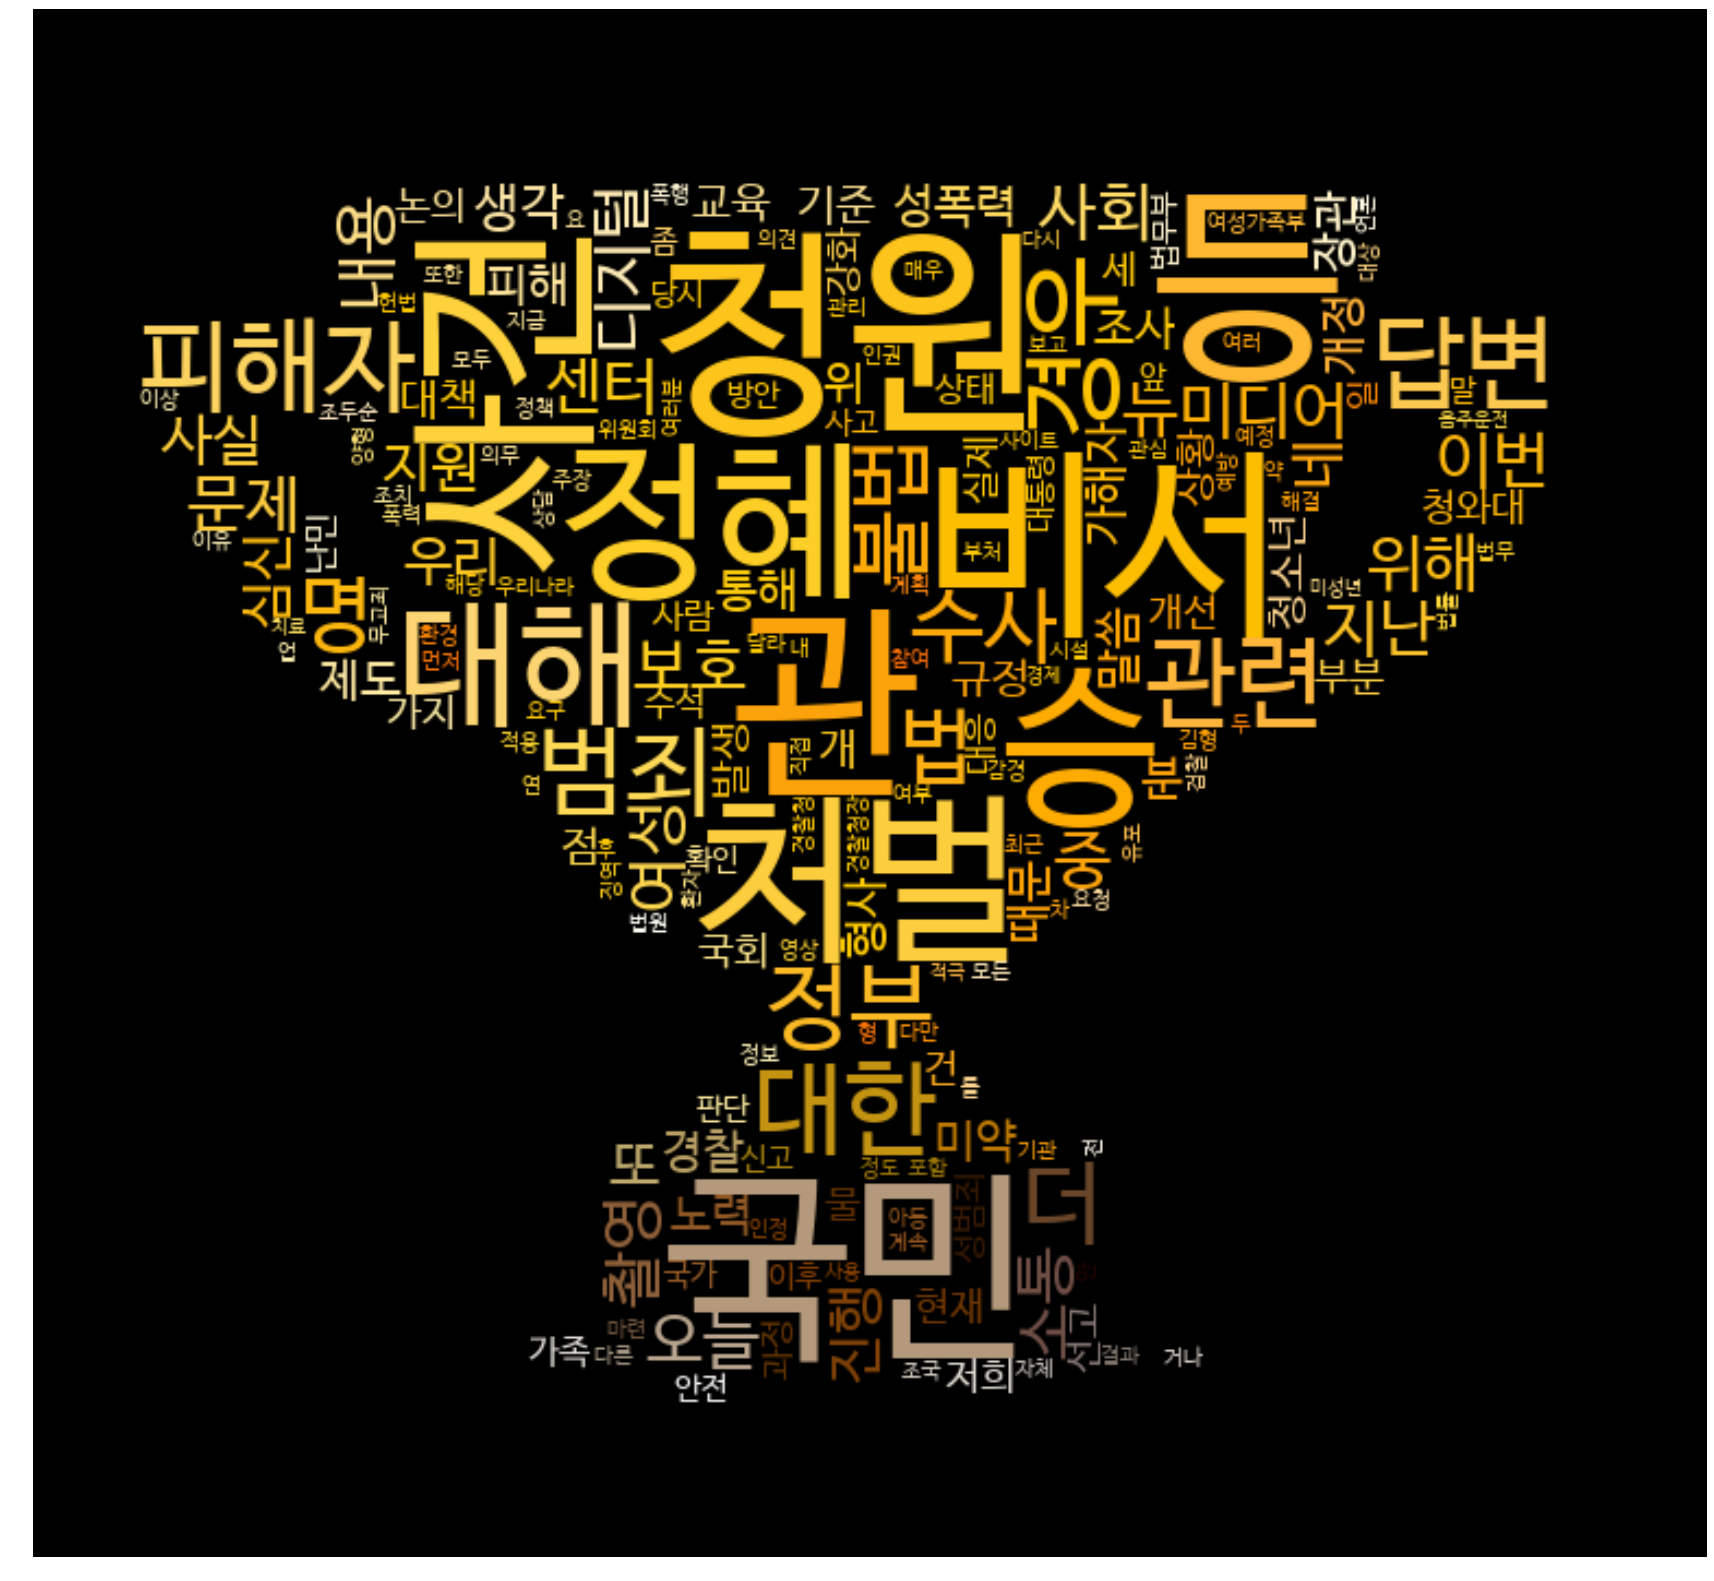

In [9]:
keyword = G_make_cloud("기타", png_name="tr2.JPG",state="img",max_font_size_n = 100,background_color_n='black')

## 전체에 대한 워드클라우드

In [15]:
def all_make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
    text = list(df["petition_answer"])
    text.extend(list(df["petition_overview"]))
    text = ' '.join(text)
    
        
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')

    font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf").get_name()
    rc('font', family=font_name)
    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)
        
    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

    return tmp_data

409264
ok


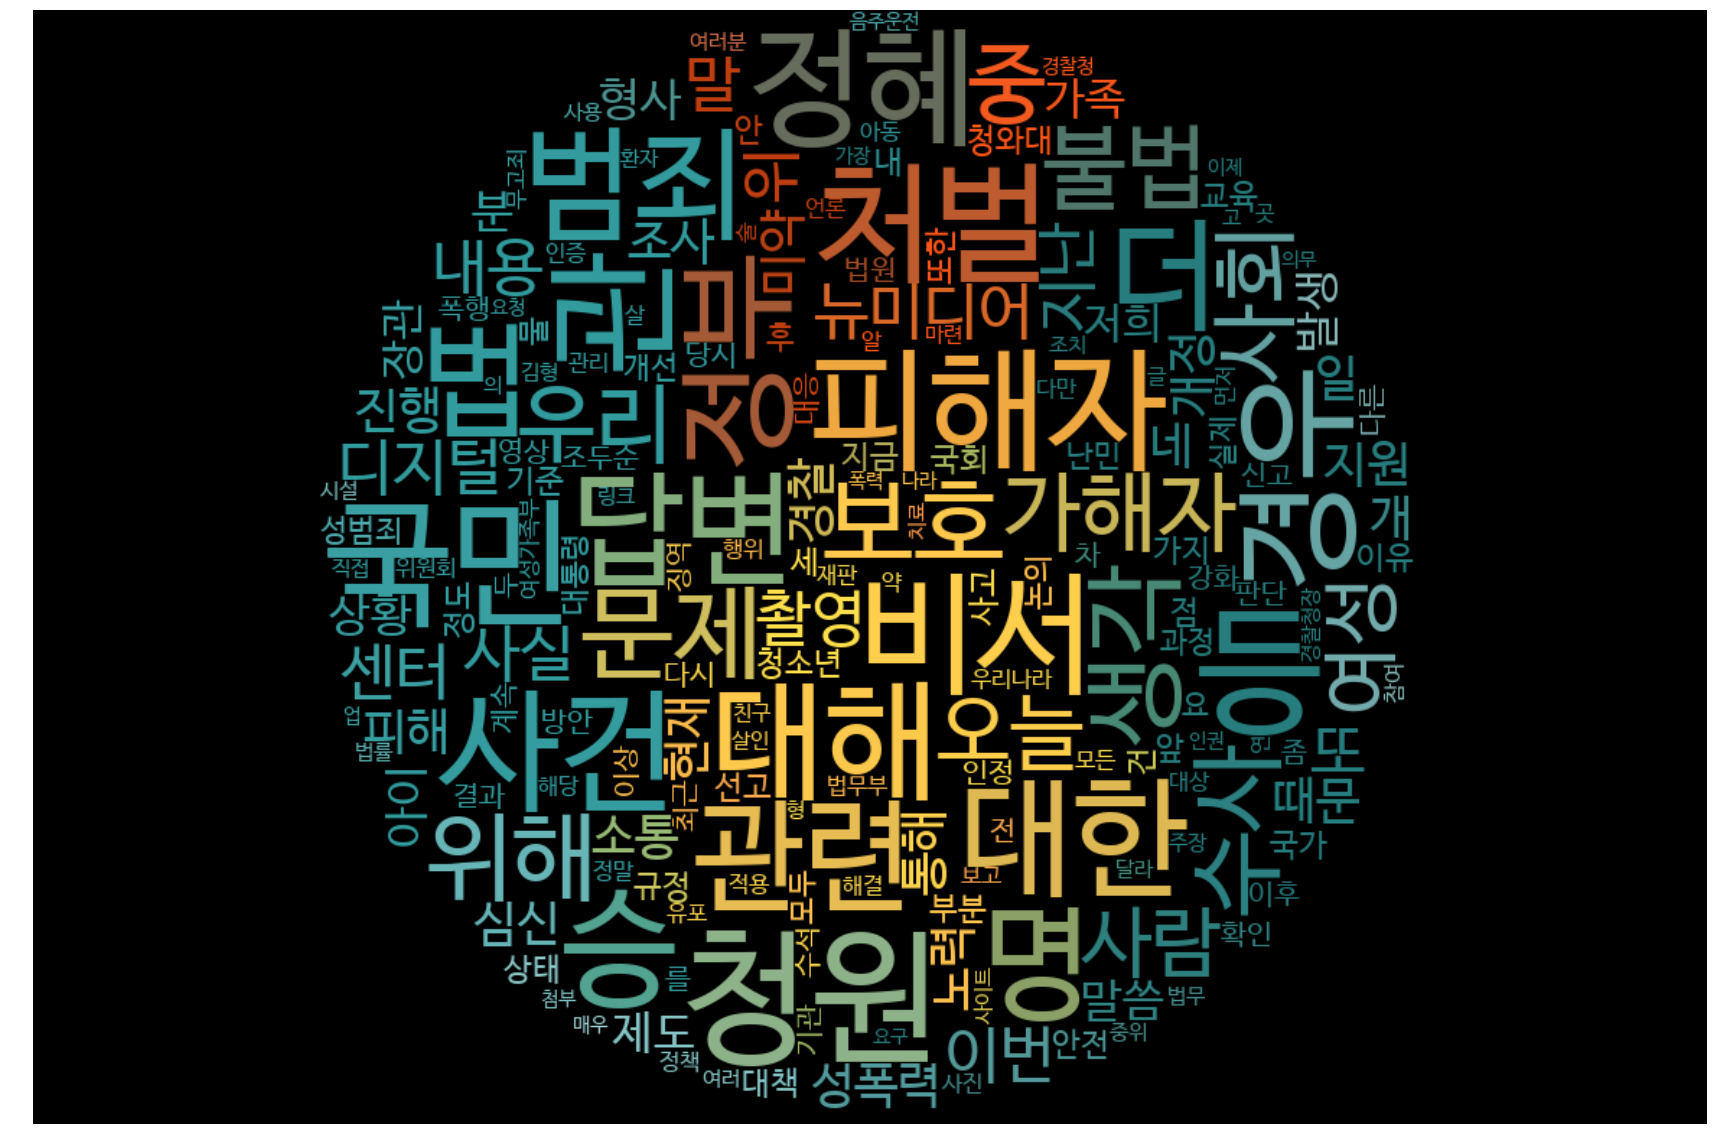

In [23]:
keyword = all_make_cloud("기타", png_name="te3.jpg",state="img",max_font_size_n = 100,background_color_n='black')

409264
ok


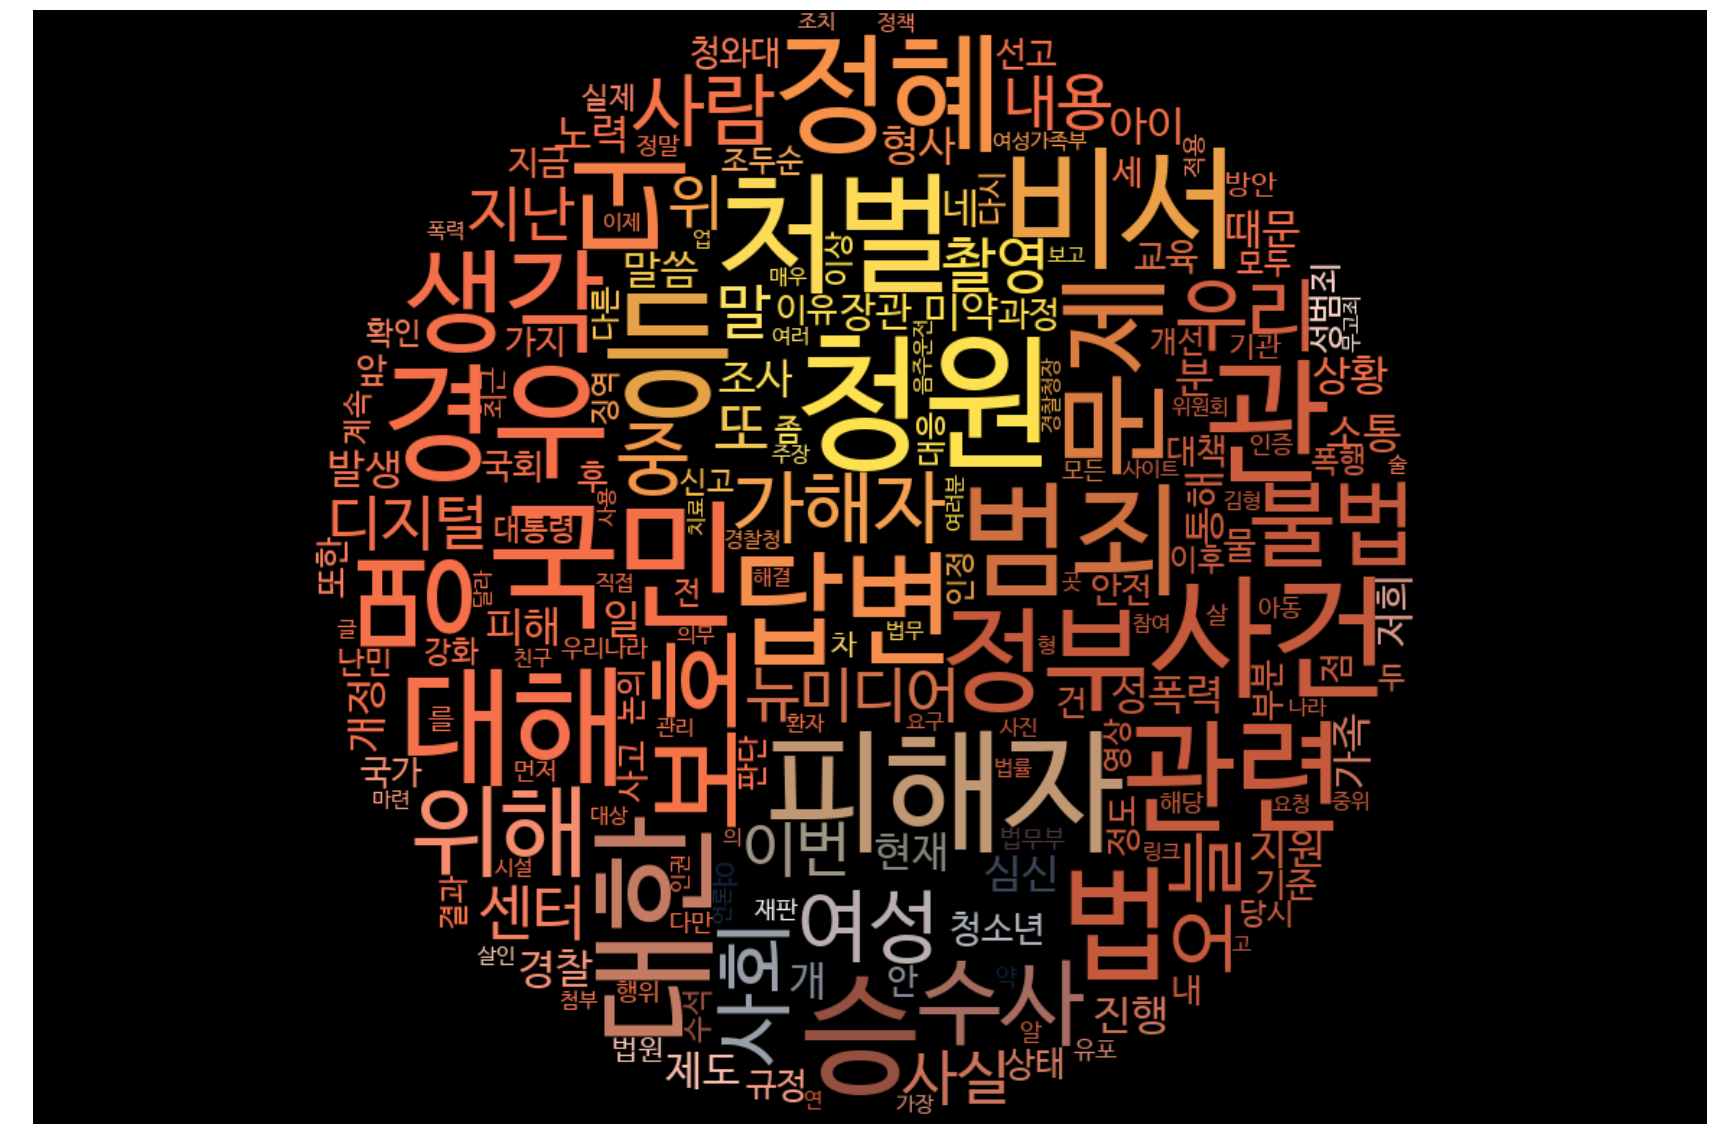

In [22]:
keyword = all_make_cloud("기타", png_name="te2.jpg",state="img",max_font_size_n = 100,background_color_n='black')

409264
ok


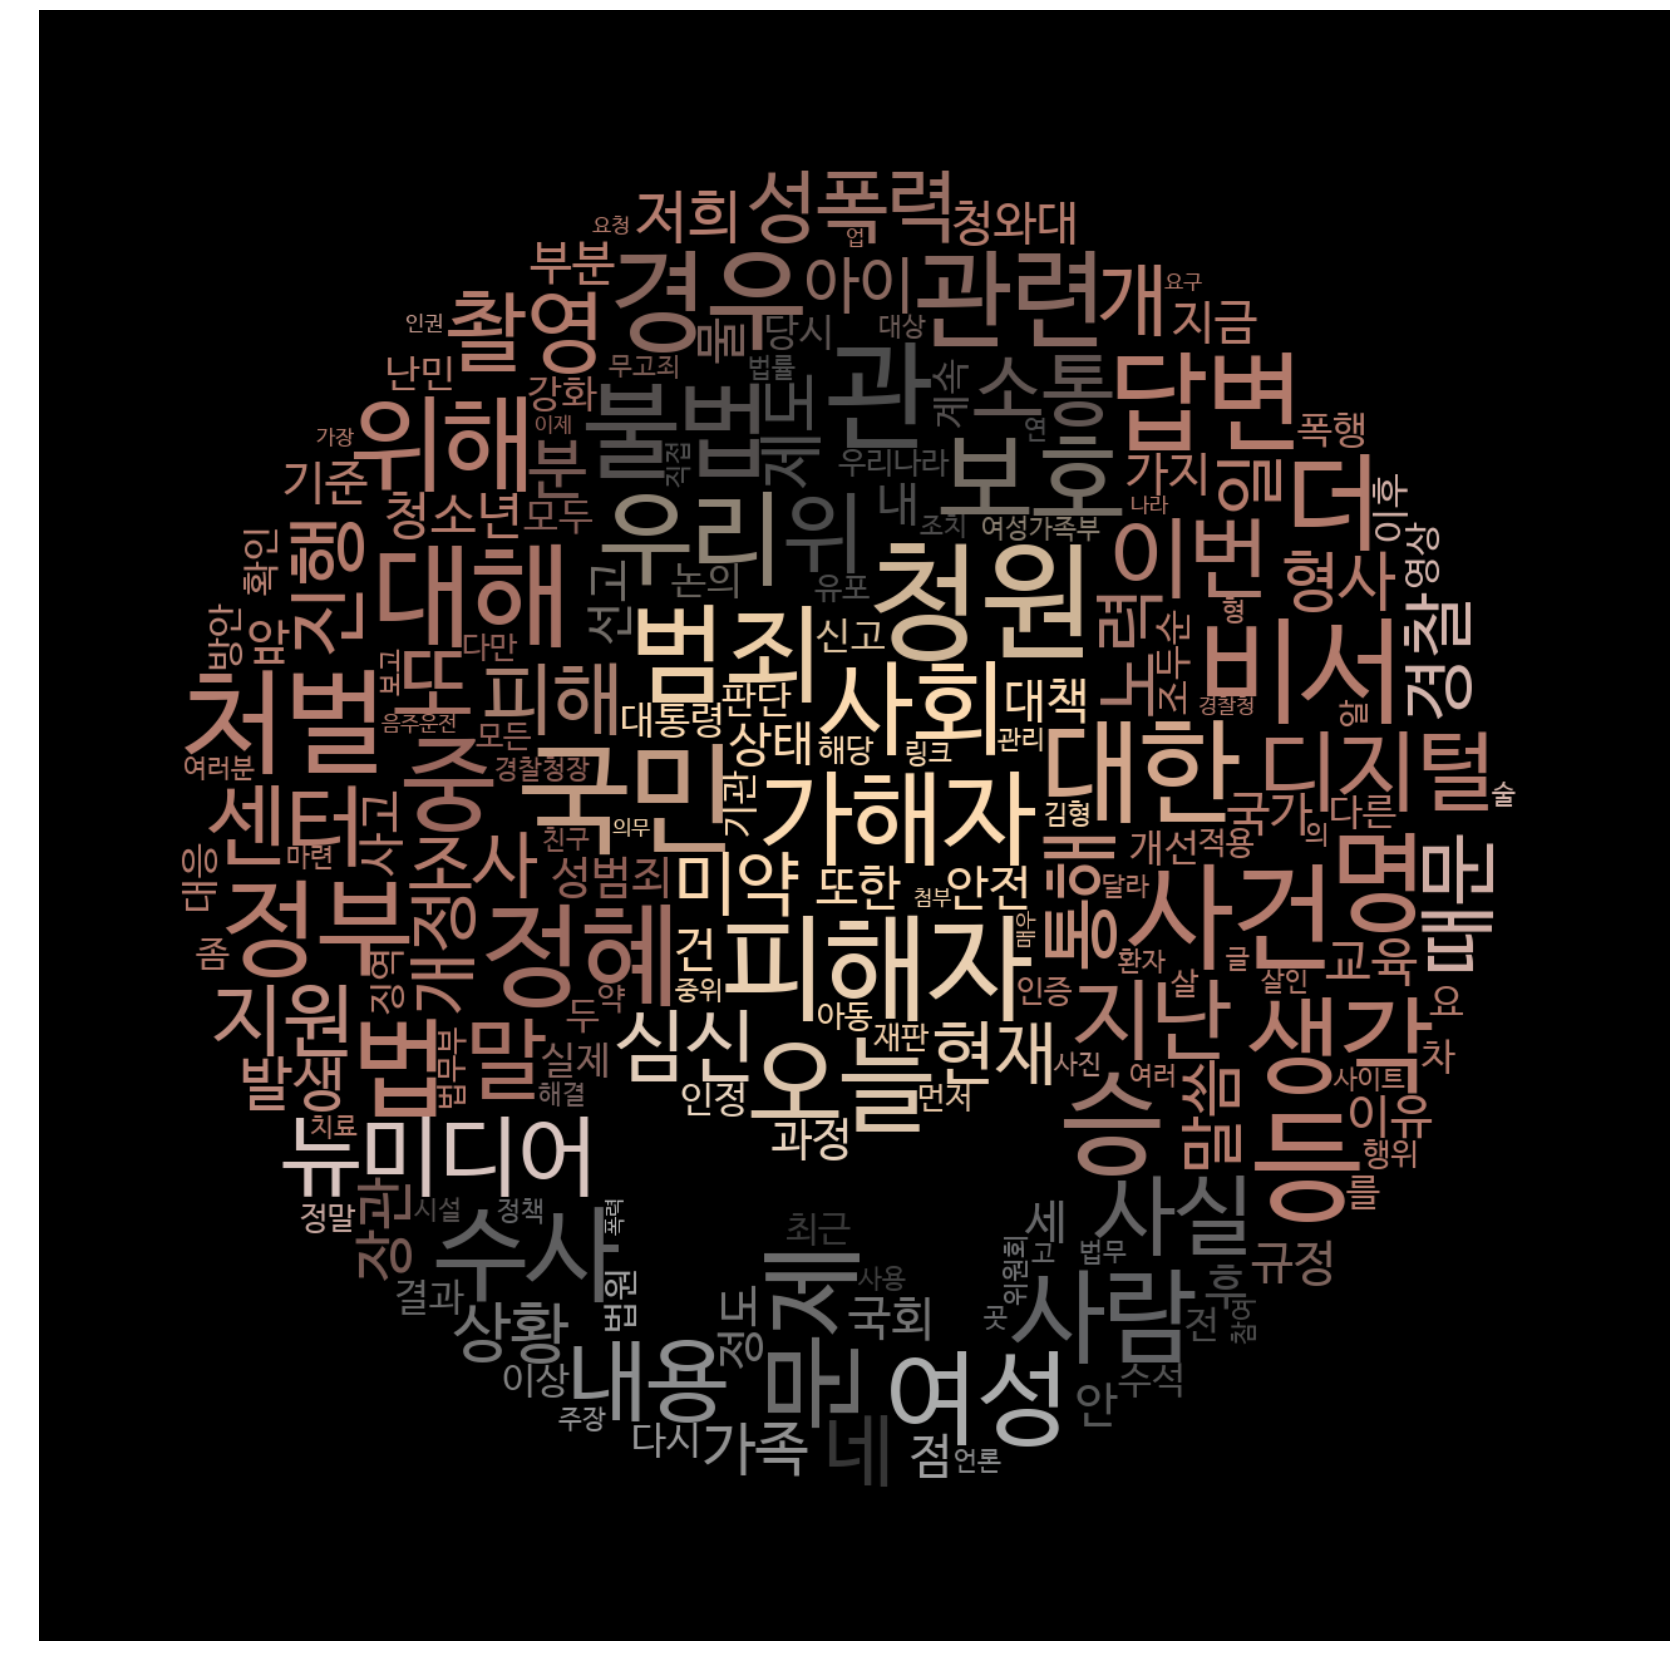

In [19]:
keyword = all_make_cloud("기타", png_name="te.jpg",state="img",max_font_size_n = 100,background_color_n='black')

409264
ok


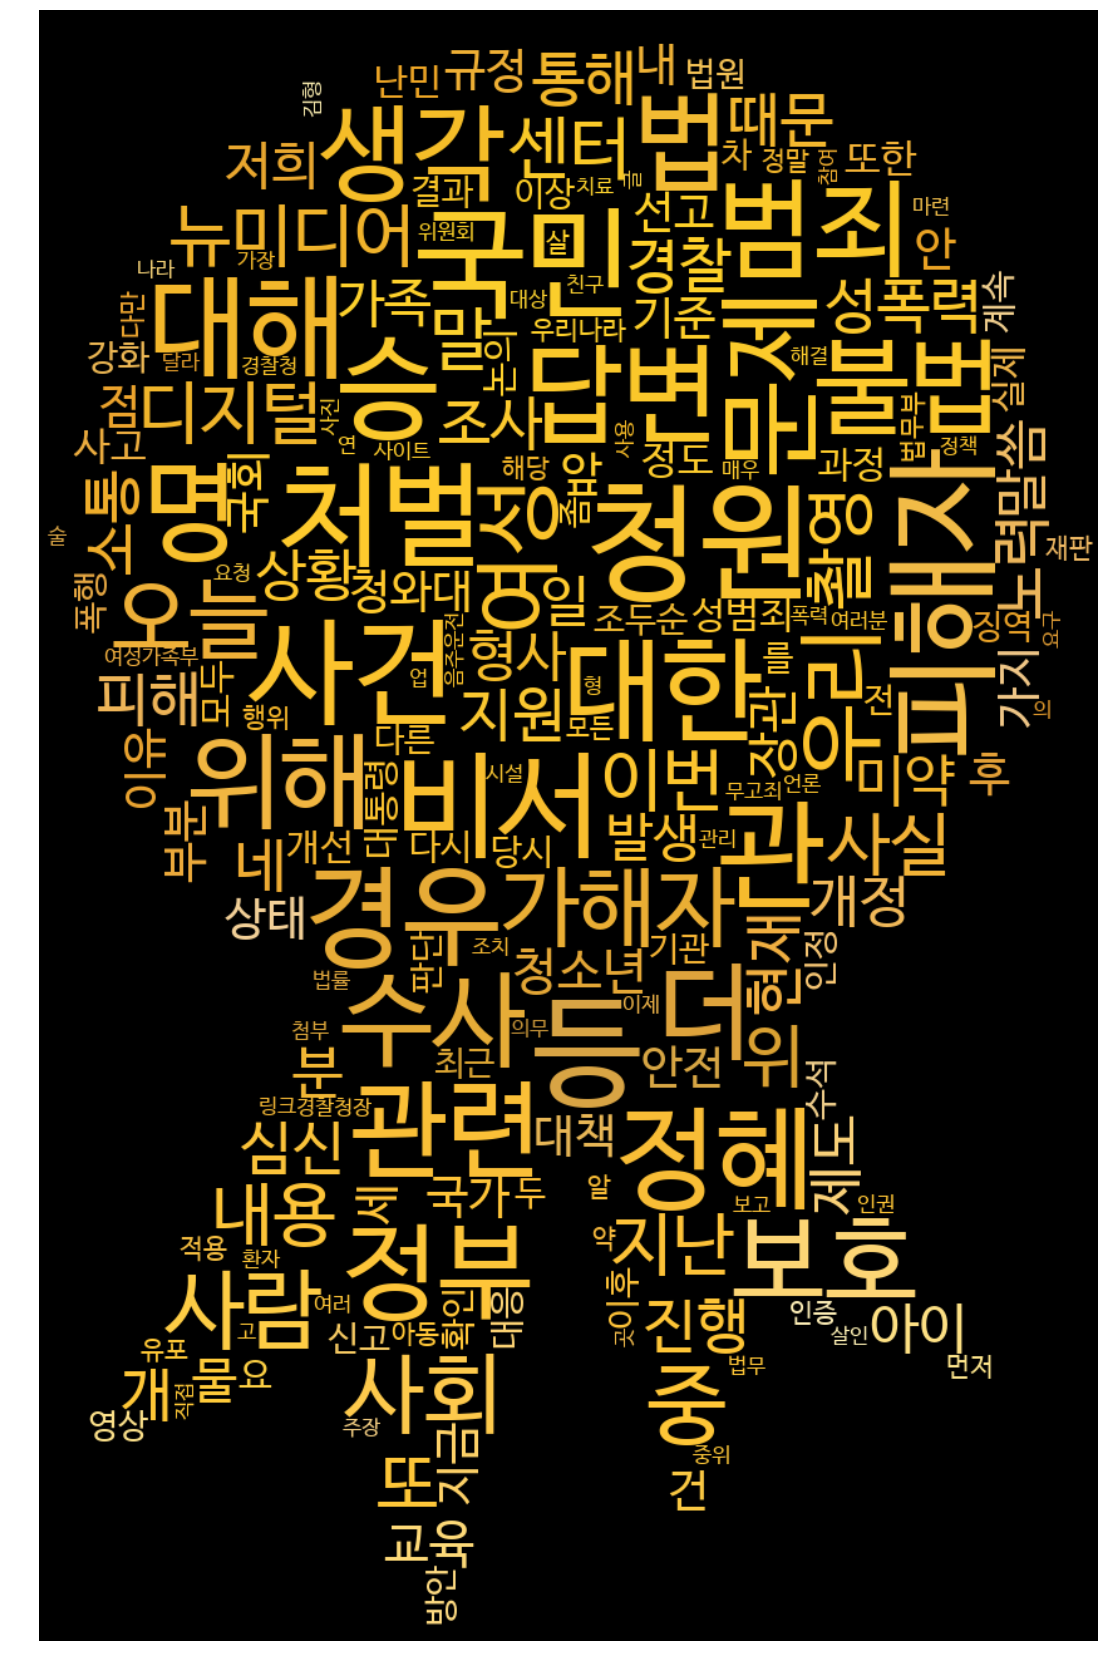

In [18]:
keyword = all_make_cloud("기타", png_name="al.jpg",state="img",max_font_size_n = 100,background_color_n='black')

## top 키워드들 보기

In [17]:
#all
keyword

{'청원': 714,
 '국민': 576,
 '등': 567,
 '관': 510,
 '사건': 454,
 '피해자': 451,
 '비서': 444,
 '처벌': 412,
 '대한': 366,
 '대해': 358,
 '정혜': 344,
 '승': 344,
 '경우': 332,
 '답변': 312,
 '더': 293,
 '법': 285,
 '관련': 281,
 '범죄': 274,
 '명': 266,
 '정부': 256,
 '문제': 246,
 '생각': 244,
 '보호': 240,
 '위해': 239,
 '수사': 237,
 '불법': 233,
 '가해자': 223,
 '우리': 222,
 '중': 218,
 '사회': 215,
 '오늘': 214,
 '사람': 210,
 '여성': 206,
 '뉴미디어': 205,
 '센터': 200,
 '디지털': 200,
 '이번': 197,
 '촬영': 195,
 '내용': 189,
 '또': 188,
 '사실': 185,
 '지난': 183,
 '말': 177,
 '위': 174,
 '성폭력': 168,
 '피해': 168,
 '소통': 167,
 '진행': 164,
 '네': 163,
 '심신': 163,
 '지원': 162,
 '통해': 161,
 '때문': 158,
 '개': 155,
 '조사': 154,
 '경찰': 154,
 '노력': 152,
 '현재': 147,
 '미약': 145,
 '개정': 144,
 '일': 144,
 '상황': 139,
 '제도': 135,
 '분': 134,
 '형사': 133,
 '말씀': 133,
 '아이': 132,
 '발생': 132,
 '가족': 130,
 '장관': 130,
 '저희': 129,
 '청소년': 127,
 '교육': 121,
 '물': 119,
 '청와대': 117,
 '안전': 117,
 '기준': 116,
 '점': 116,
 '규정': 115,
 '안': 114,
 '국가': 114,
 '대책': 113,
 '상태': 112,
 '가지': 110,
 

In [10]:
# 답변 키워드
keyword

{'청원': 660,
 '관': 506,
 '등': 498,
 '국민': 466,
 '비서': 444,
 '사건': 367,
 '처벌': 348,
 '정혜': 344,
 '승': 344,
 '대해': 319,
 '피해자': 313,
 '대한': 312,
 '답변': 309,
 '경우': 299,
 '관련': 252,
 '범죄': 236,
 '정부': 235,
 '더': 219,
 '수사': 213,
 '명': 209,
 '법': 206,
 '불법': 206,
 '뉴미디어': 205,
 '문제': 200,
 '오늘': 199,
 '위해': 198,
 '센터': 198,
 '보호': 195,
 '이번': 190,
 '디지털': 183,
 '중': 177,
 '사회': 172,
 '지난': 169,
 '여성': 169,
 '소통': 167,
 '내용': 163,
 '촬영': 162,
 '사실': 158,
 '또': 158,
 '진행': 157,
 '네': 156,
 '우리': 154,
 '지원': 152,
 '심신': 152,
 '생각': 147,
 '성폭력': 147,
 '노력': 144,
 '통해': 140,
 '경찰': 137,
 '미약': 133,
 '가해자': 132,
 '장관': 130,
 '피해': 128,
 '조사': 127,
 '말씀': 126,
 '제도': 126,
 '개정': 124,
 '분': 121,
 '위': 120,
 '때문': 118,
 '형사': 117,
 '교육': 116,
 '규정': 113,
 '점': 112,
 '기준': 111,
 '개': 111,
 '청소년': 108,
 '대책': 108,
 '상황': 108,
 '발생': 106,
 '청와대': 104,
 '현재': 100,
 '저희': 98,
 '국회': 98,
 '논의': 98,
 '부분': 96,
 '가지': 94,
 '건': 93,
 '개선': 91,
 '물': 91,
 '강화': 90,
 '실제': 89,
 '선고': 89,
 '세': 88,
 '가족': 88,
 

In [16]:
#청원 글에 대해서
keyword

{'피해자': 138,
 '사람': 124,
 '국민': 110,
 '말': 99,
 '생각': 97,
 '가해자': 91,
 '사건': 87,
 '아이': 87,
 '법': 79,
 '더': 74,
 '등': 69,
 '우리': 68,
 '링크': 66,
 '처벌': 64,
 '일': 62,
 '첨부': 60,
 '동생': 59,
 '인증': 58,
 '명': 57,
 '청원': 54,
 '위': 54,
 '대한': 54,
 '안': 53,
 '사진': 53,
 '친구': 52,
 '현재': 47,
 '문제': 46,
 '보호': 45,
 '이유': 45,
 '개': 44,
 '사회': 43,
 '글': 42,
 '가족': 42,
 '후': 42,
 '위해': 41,
 '중': 41,
 '내': 41,
 '때문': 40,
 '살': 40,
 '피해': 40,
 '정말': 39,
 '대해': 39,
 '범죄': 38,
 '또한': 38,
 '폭행': 37,
 '자신': 37,
 '여성': 37,
 '안전': 37,
 '대한민국': 35,
 '국가': 35,
 '지금': 35,
 '성민': 34,
 '경우': 33,
 '요': 33,
 '왜': 33,
 '재판': 33,
 '촬영': 33,
 '정도': 32,
 '아빠': 32,
 '중위': 32,
 '상황': 31,
 '곳': 31,
 '저희': 31,
 '알': 30,
 '모두': 30,
 '상태': 30,
 '앞': 30,
 '또': 30,
 '전': 30,
 '못': 29,
 '관련': 29,
 '신랑': 29,
 '술': 28,
 '행위': 28,
 '게': 28,
 '물': 28,
 '여자': 27,
 '불법': 27,
 '사실': 27,
 '검사': 27,
 '조사': 27,
 '이상': 26,
 '모든': 26,
 '다시': 26,
 '나라': 26,
 '발생': 26,
 '내용': 26,
 '대통령': 25,
 '마음': 25,
 '나': 25,
 '조두순': 25,
 '기사': 25,
 '영상'